In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

# Get outcome dataframe

In [3]:
outcome_xls = pd.ExcelFile("/mnt/c/Users/tachenne/delta-rad/Recueil clinique pancréas MRIdian.xls") # if date de recidive locale et date de recidive meta vide 
last_sheet_name = outcome_xls.sheet_names[-1]

# Lire la première feuille dans un DataFrame
outcome_df = outcome_xls.parse(last_sheet_name)
outcome_df = outcome_df.rename(columns={'Unnamed: 0': 'Liste recueil clinique', 'Unnamed: 4': 'Date de recidive locale',  'Unnamed: 6': 'Date de recidive méta'})
outcome_df = outcome_df.loc[9:]
outcome_df = outcome_df[['Liste recueil clinique', 'Date de recidive locale', 'Date de recidive méta']]
print(outcome_df.columns)
outcome_df.head(10)


Index(['Liste recueil clinique', 'Date de recidive locale',
       'Date de recidive méta'],
      dtype='object')


,Liste recueil clinique,Date de recidive locale,Date de recidive méta
9,1403778,NaN,2019-12-18 00:00:00
10,1906503,2020-07-01 00:00:00,2021-04-15 00:00:00
11,1904130,NaN,2020-09-18 00:00:00
12,1905976,NaN,2020-03-06 00:00:00
13,1907649,NaN,2020-04-30 00:00:00
14,1904380,2020-10-13 00:00:00,2020-11-23 00:00:00
15,1801184,NaN,NaN
16,1906208,NaN,2020-10-16 00:00:00
17,1907959,2020-03-05 00:00:00,2020-08-24 00:00:00
18,1908067,NaN,2020-05-14 00:00:00


In [4]:
status = ~outcome_df['Date de recidive locale'].isnull() | ~outcome_df['Date de recidive méta'].isnull()
print(status)


9      True
10     True
11     True
12     True
13     True
      ...  
95    False
96     True
97    False
98     True
99     True
Length: 91, dtype: bool


In [5]:
outcome_df.insert(loc=3, column='Recurrence', value=status)
outcome_df

,Liste recueil clinique,Date de recidive locale,Date de recidive méta,Recurrence
9,1403778,NaN,2019-12-18 00:00:00,True
10,1906503,2020-07-01 00:00:00,2021-04-15 00:00:00,True
11,1904130,NaN,2020-09-18 00:00:00,True
12,1905976,NaN,2020-03-06 00:00:00,True
13,1907649,NaN,2020-04-30 00:00:00,True
...,...,...,...,...
95,2204364,NaN,NaN,False
96,2201397,NaN,2022-09-27 00:00:00,True
97,2204013,NaN,NaN,False
98,2102092,2021-12-02 00:00:00,NaN,True


In [6]:
# get patient list file (only patient numbers and real ID ICM)
patient_file = "/mnt/c/Users/tachenne/delta-rad/Liste patients pancréas exports.xlsx"
patients_df = pd.read_excel(patient_file, index_col=0)
patients_df = patients_df[['Liste recueil clinique']]
patients_df.head()
print("Longueur du fichier patient: ", patients_df.size)


Longueur du fichier patient:  91


In [7]:
patients_df

,Liste recueil clinique
Patient 1,1403778.0
Patient 2,1906503.0
Patient 3,1904130.0
Patient 4,1905976.0
Patient 5,1907649.0
...,...
NaN,2204364.0
NaN,2201397.0
NaN,2204013.0
NaN,2102092.0


In [8]:
cleaned_outcome_df = outcome_df[outcome_df['Liste recueil clinique'] != 2003007]

In [9]:
cleaned_outcome_df = cleaned_outcome_df.iloc[: - 5]
cleaned_outcome_df

,Liste recueil clinique,Date de recidive locale,Date de recidive méta,Recurrence
9,1403778,NaN,2019-12-18 00:00:00,True
10,1906503,2020-07-01 00:00:00,2021-04-15 00:00:00,True
11,1904130,NaN,2020-09-18 00:00:00,True
12,1905976,NaN,2020-03-06 00:00:00,True
13,1907649,NaN,2020-04-30 00:00:00,True
...,...,...,...,...
90,2107222,NaN,2023-02-01 00:00:00,True
91,2107572,NaN,2022-09-24 00:00:00,True
92,2202953,2023-04-27 00:00:00,2023-04-27 00:00:00,True
93,0.601828,NaN,2022-12-05 00:00:00,True


In [10]:
print(cleaned_outcome_df.index)

Index([ 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26,
       27, 28, 29, 30, 31, 32, 33, 34, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45,
       46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63,
       64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81,
       82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94],
      dtype='int64')


In [11]:
new_indices = list(range(1, 87))  # De 1 à 85
new_indices.remove(27)
print(new_indices)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86]


In [12]:
cleaned_outcome_df.iloc[27]

Liste recueil clinique                 2006974
Date de recidive locale                    NaN
Date de recidive méta      2021-08-24 00:00:00
Recurrence                                True
Name: 37, dtype: object

In [13]:
cleaned_outcome_df.index = ['Patient ' + str(x) for x in new_indices]
cleaned_outcome_df

,Liste recueil clinique,Date de recidive locale,Date de recidive méta,Recurrence
Patient 1,1403778,NaN,2019-12-18 00:00:00,True
Patient 2,1906503,2020-07-01 00:00:00,2021-04-15 00:00:00,True
Patient 3,1904130,NaN,2020-09-18 00:00:00,True
Patient 4,1905976,NaN,2020-03-06 00:00:00,True
Patient 5,1907649,NaN,2020-04-30 00:00:00,True
...,...,...,...,...
Patient 82,2107222,NaN,2023-02-01 00:00:00,True
Patient 83,2107572,NaN,2022-09-24 00:00:00,True
Patient 84,2202953,2023-04-27 00:00:00,2023-04-27 00:00:00,True
Patient 85,0.601828,NaN,2022-12-05 00:00:00,True


## Count number of recurrence True and false


In [14]:
# Compter les occurrences de True
true_rec_patients = cleaned_outcome_df[cleaned_outcome_df['Recurrence'] == True]

# Compter les occurrences de False
false_rec_patients = cleaned_outcome_df[cleaned_outcome_df['Recurrence'] == False]


In [15]:
true_rec_patients

,Liste recueil clinique,Date de recidive locale,Date de recidive méta,Recurrence
Patient 1,1403778,NaN,2019-12-18 00:00:00,True
Patient 2,1906503,2020-07-01 00:00:00,2021-04-15 00:00:00,True
Patient 3,1904130,NaN,2020-09-18 00:00:00,True
Patient 4,1905976,NaN,2020-03-06 00:00:00,True
Patient 5,1907649,NaN,2020-04-30 00:00:00,True
...,...,...,...,...
Patient 80,1000305,2022-10-05 00:00:00,2022-10-05 00:00:00,True
Patient 82,2107222,NaN,2023-02-01 00:00:00,True
Patient 83,2107572,NaN,2022-09-24 00:00:00,True
Patient 84,2202953,2023-04-27 00:00:00,2023-04-27 00:00:00,True


In [16]:
false_rec_patients

,Liste recueil clinique,Date de recidive locale,Date de recidive méta,Recurrence
Patient 7,1801184,NaN,NaN,False
Patient 12,1906566,NaN,NaN,False
Patient 16,1104589,NaN,NaN,False
Patient 20,2000339,NaN,NaN,False
Patient 23,2003554,NaN,NaN,False
Patient 28,2005140,NaN,NaN,False
Patient 30,2006179,NaN,NaN,False
Patient 40,2101761,NaN,NaN,False
Patient 42,2007413,NaN,NaN,False
Patient 43,2102231,NaN,NaN,False


## Check that true rec not in false rec patients and the reverse 

In [17]:
print("\nVérification détaillée :")
for index in cleaned_outcome_df.index:
    if cleaned_outcome_df.loc[index, 'Recurrence']:
        assert cleaned_outcome_df.loc[index, 'Recurrence'], f"Erreur: Patient {index} avec Recurrence=True est dans les patients avec Recurrence=False"
    else:
        assert not cleaned_outcome_df.loc[index, 'Recurrence'], f"Erreur: Patient {index} avec Recurrence=False est dans les patients avec Recurrence=True"
print("Vérification terminée. ")



Vérification détaillée :
Vérification terminée. 


## Separate train and validation data
We need 30% of the patients for validation. But we are not going to sample them randomly but we want to keep the same recurrence (false/true) distribution. 

In [18]:
val_coef = 0.3
true_val_size = 19
false_val_size = 6
print(true_val_size, false_val_size, int(val_coef*len(cleaned_outcome_df)))
assert true_val_size + false_val_size == int(val_coef*len(cleaned_outcome_df)), "Error"


19 6 25


In [19]:
true_rec_val_patients = true_rec_patients.sample(n=true_val_size, random_state=42) # extract true recurrence patients for validation from true recurrence patients
true_rec_val_patients


,Liste recueil clinique,Date de recidive locale,Date de recidive méta,Recurrence
Patient 84,2202953,2023-04-27 00:00:00,2023-04-27 00:00:00,True
Patient 79,2200671,2022-11-14 00:00:00,NaN,True
Patient 1,1403778,NaN,2019-12-18 00:00:00,True
Patient 59,2106453,NaN,2022-02-22 00:00:00,True
Patient 6,1904380,2020-10-13 00:00:00,2020-11-23 00:00:00,True
Patient 49,2103912,NaN,2022-10-31 00:00:00,True
Patient 21,9802362,NaN,2021-07-05 00:00:00,True
Patient 15,1908485,NaN,2020-05-20 00:00:00,True
Patient 34,2007805,NaN,2021-12-01 00:00:00,True
Patient 83,2107572,NaN,2022-09-24 00:00:00,True


In [20]:
true_rec_train_patients = true_rec_patients.drop(true_rec_val_patients.index)
true_rec_train_patients.head()

,Liste recueil clinique,Date de recidive locale,Date de recidive méta,Recurrence
Patient 2,1906503,2020-07-01 00:00:00,2021-04-15 00:00:00,True
Patient 3,1904130,NaN,2020-09-18 00:00:00,True
Patient 5,1907649,NaN,2020-04-30 00:00:00,True
Patient 8,1906208,NaN,2020-10-16 00:00:00,True
Patient 9,1907959,2020-03-05 00:00:00,2020-08-24 00:00:00,True


In [21]:
print(len(true_rec_train_patients) + len(true_rec_val_patients), "patients that did not repond to RT (had recurrence)")

63 patients that did not repond to RT (had recurrence)


In [22]:
false_rec_val_patients = false_rec_patients.sample(n=false_val_size, random_state=42)
false_rec_val_patients

,Liste recueil clinique,Date de recidive locale,Date de recidive méta,Recurrence
Patient 7,1801184,NaN,NaN,False
Patient 58,2106028,NaN,NaN,False
Patient 42,2007413,NaN,NaN,False
Patient 12,1906566,NaN,NaN,False
Patient 62,2104368,NaN,NaN,False
Patient 28,2005140,NaN,NaN,False


In [23]:
false_rec_train_patients = false_rec_patients.drop(false_rec_val_patients.index)
false_rec_train_patients.head()

,Liste recueil clinique,Date de recidive locale,Date de recidive méta,Recurrence
Patient 16,1104589,NaN,NaN,False
Patient 20,2000339,NaN,NaN,False
Patient 23,2003554,NaN,NaN,False
Patient 30,2006179,NaN,NaN,False
Patient 40,2101761,NaN,NaN,False


In [24]:
print(len(false_rec_val_patients)+len(false_rec_train_patients), "patients that did respond well to RT (had no recurrence)")

22 patients that did respond well to RT (had no recurrence)


# Feature selection
Test for one csv file and compare

## F1/F2 with GTV 
Idée: analyser la corrélation entre données GTV et PTV

In [25]:
features_list = [
    'original_shape_Elongation', 'original_shape_Flatness', 'original_shape_LeastAxisLength',
    'original_shape_MajorAxisLength', 'original_shape_Maximum2DDiameterColumn',
    'original_shape_Maximum2DDiameterRow', 'original_shape_Maximum2DDiameterSlice',
    'original_shape_Maximum3DDiameter', 'original_shape_MeshVolume',
    'original_shape_MinorAxisLength', 'original_shape_Sphericity',
    'original_shape_SurfaceArea', 'original_shape_SurfaceVolumeRatio',
    'original_shape_VoxelVolume', 'original_firstorder_10Percentile',
    'original_firstorder_90Percentile', 'original_firstorder_Energy',
    'original_firstorder_Entropy', 'original_firstorder_InterquartileRange',
    'original_firstorder_Kurtosis', 'original_firstorder_Maximum',
    'original_firstorder_MeanAbsoluteDeviation', 'original_firstorder_Mean',
    'original_firstorder_Median', 'original_firstorder_Minimum',
    'original_firstorder_Range', 'original_firstorder_RobustMeanAbsoluteDeviation',
    'original_firstorder_RootMeanSquared', 'original_firstorder_Skewness',
    'original_firstorder_TotalEnergy', 'original_firstorder_Uniformity',
    'original_firstorder_Variance', 'original_glcm_Autocorrelation',
    'original_glcm_ClusterProminence', 'original_glcm_ClusterShade',
    'original_glcm_ClusterTendency', 'original_glcm_Contrast',
    'original_glcm_Correlation', 'original_glcm_DifferenceAverage',
    'original_glcm_DifferenceEntropy', 'original_glcm_DifferenceVariance',
    'original_glcm_Id', 'original_glcm_Idm', 'original_glcm_Idmn', 'original_glcm_Idn',
    'original_glcm_Imc1', 'original_glcm_Imc2', 'original_glcm_InverseVariance',
    'original_glcm_JointAverage', 'original_glcm_JointEnergy',
    'original_glcm_JointEntropy', 'original_glcm_MCC', 'original_glcm_MaximumProbability',
    'original_glcm_SumAverage', 'original_glcm_SumEntropy', 'original_glcm_SumSquares',
    'original_glrlm_GrayLevelNonUniformity', 'original_glrlm_GrayLevelNonUniformityNormalized',
    'original_glrlm_GrayLevelVariance', 'original_glrlm_HighGrayLevelRunEmphasis',
    'original_glrlm_LongRunEmphasis', 'original_glrlm_LongRunHighGrayLevelEmphasis',
    'original_glrlm_LongRunLowGrayLevelEmphasis', 'original_glrlm_LowGrayLevelRunEmphasis',
    'original_glrlm_RunEntropy', 'original_glrlm_RunLengthNonUniformity',
    'original_glrlm_RunLengthNonUniformityNormalized', 'original_glrlm_RunPercentage',
    'original_glrlm_RunVariance', 'original_glrlm_ShortRunEmphasis',
    'original_glrlm_ShortRunHighGrayLevelEmphasis', 'original_glrlm_ShortRunLowGrayLevelEmphasis',
    'original_glszm_GrayLevelNonUniformity', 'original_glszm_GrayLevelNonUniformityNormalized',
    'original_glszm_GrayLevelVariance', 'original_glszm_HighGrayLevelZoneEmphasis',
    'original_glszm_LargeAreaEmphasis', 'original_glszm_LargeAreaHighGrayLevelEmphasis',
    'original_glszm_LargeAreaLowGrayLevelEmphasis', 'original_glszm_LowGrayLevelZoneEmphasis',
    'original_glszm_SizeZoneNonUniformity', 'original_glszm_SizeZoneNonUniformityNormalized',
    'original_glszm_SmallAreaEmphasis', 'original_glszm_SmallAreaHighGrayLevelEmphasis',
    'original_glszm_SmallAreaLowGrayLevelEmphasis', 'original_glszm_ZoneEntropy',
    'original_glszm_ZonePercentage', 'original_glszm_ZoneVariance',
    'original_gldm_DependenceEntropy', 'original_gldm_DependenceNonUniformity',
    'original_gldm_DependenceNonUniformityNormalized', 'original_gldm_DependenceVariance',
    'original_gldm_GrayLevelNonUniformity', 'original_gldm_GrayLevelVariance',
    'original_gldm_HighGrayLevelEmphasis', 'original_gldm_LargeDependenceEmphasis',
    'original_gldm_LargeDependenceHighGrayLevelEmphasis',
    'original_gldm_LargeDependenceLowGrayLevelEmphasis',
    'original_gldm_LowGrayLevelEmphasis', 'original_gldm_SmallDependenceEmphasis',
    'original_gldm_SmallDependenceHighGrayLevelEmphasis',
    'original_gldm_SmallDependenceLowGrayLevelEmphasis', 'original_ngtdm_Busyness',
    'original_ngtdm_Coarseness', 'original_ngtdm_Complexity', 'original_ngtdm_Contrast',
    'original_ngtdm_Strength'
]
# define dataframe columns
names = ['ID'] + features_list
print(names)
# define columns of simu/F1 delta rad next dataframe 
new_feature_list = ['delta_f1_f2_gtv_' + x for x in features_list]
print(new_feature_list)

['ID', 'original_shape_Elongation', 'original_shape_Flatness', 'original_shape_LeastAxisLength', 'original_shape_MajorAxisLength', 'original_shape_Maximum2DDiameterColumn', 'original_shape_Maximum2DDiameterRow', 'original_shape_Maximum2DDiameterSlice', 'original_shape_Maximum3DDiameter', 'original_shape_MeshVolume', 'original_shape_MinorAxisLength', 'original_shape_Sphericity', 'original_shape_SurfaceArea', 'original_shape_SurfaceVolumeRatio', 'original_shape_VoxelVolume', 'original_firstorder_10Percentile', 'original_firstorder_90Percentile', 'original_firstorder_Energy', 'original_firstorder_Entropy', 'original_firstorder_InterquartileRange', 'original_firstorder_Kurtosis', 'original_firstorder_Maximum', 'original_firstorder_MeanAbsoluteDeviation', 'original_firstorder_Mean', 'original_firstorder_Median', 'original_firstorder_Minimum', 'original_firstorder_Range', 'original_firstorder_RobustMeanAbsoluteDeviation', 'original_firstorder_RootMeanSquared', 'original_firstorder_Skewness',

In [26]:
# load data
f1_f2_gtv_df = pd.read_csv("/mnt/c/Users/tachenne/delta-rad/Results GTV-PTV/ratio_f2_f1_gtv.csv", sep =',', header=None, names=new_feature_list) # 
f1_f2_gtv_df


,delta_f1_f2_gtv_original_shape_Elongation,delta_f1_f2_gtv_original_shape_Flatness,delta_f1_f2_gtv_original_shape_LeastAxisLength,delta_f1_f2_gtv_original_shape_MajorAxisLength,delta_f1_f2_gtv_original_shape_Maximum2DDiameterColumn,delta_f1_f2_gtv_original_shape_Maximum2DDiameterRow,delta_f1_f2_gtv_original_shape_Maximum2DDiameterSlice,delta_f1_f2_gtv_original_shape_Maximum3DDiameter,delta_f1_f2_gtv_original_shape_MeshVolume,delta_f1_f2_gtv_original_shape_MinorAxisLength,...,delta_f1_f2_gtv_original_gldm_LargeDependenceLowGrayLevelEmphasis,delta_f1_f2_gtv_original_gldm_LowGrayLevelEmphasis,delta_f1_f2_gtv_original_gldm_SmallDependenceEmphasis,delta_f1_f2_gtv_original_gldm_SmallDependenceHighGrayLevelEmphasis,delta_f1_f2_gtv_original_gldm_SmallDependenceLowGrayLevelEmphasis,delta_f1_f2_gtv_original_ngtdm_Busyness,delta_f1_f2_gtv_original_ngtdm_Coarseness,delta_f1_f2_gtv_original_ngtdm_Complexity,delta_f1_f2_gtv_original_ngtdm_Contrast,delta_f1_f2_gtv_original_ngtdm_Strength
NaN,delta_f1_f2_gtv_original_shape_Elongation,delta_f1_f2_gtv_original_shape_Flatness,delta_f1_f2_gtv_original_shape_LeastAxisLength,delta_f1_f2_gtv_original_shape_MajorAxisLength,delta_f1_f2_gtv_original_shape_Maximum2DDiamet...,delta_f1_f2_gtv_original_shape_Maximum2DDiamet...,delta_f1_f2_gtv_original_shape_Maximum2DDiamet...,delta_f1_f2_gtv_original_shape_Maximum3DDiameter,delta_f1_f2_gtv_original_shape_MeshVolume,delta_f1_f2_gtv_original_shape_MinorAxisLength,...,delta_f1_f2_gtv_original_gldm_LargeDependenceL...,delta_f1_f2_gtv_original_gldm_LowGrayLevelEmph...,delta_f1_f2_gtv_original_gldm_SmallDependenceE...,delta_f1_f2_gtv_original_gldm_SmallDependenceH...,delta_f1_f2_gtv_original_gldm_SmallDependenceL...,delta_f1_f2_gtv_original_ngtdm_Busyness,delta_f1_f2_gtv_original_ngtdm_Coarseness,delta_f1_f2_gtv_original_ngtdm_Complexity,delta_f1_f2_gtv_original_ngtdm_Contrast,delta_f1_f2_gtv_original_ngtdm_Strength
Patient 1,1.0149414258721936,1.0074374111081335,0.9974368965943667,0.9900733139451944,1.0,0.9994449070122994,1.0,1.0,0.9748118234809576,1.00486642157079,...,1.2314584487596094,1.1252224542812879,0.9486809918566094,0.9068556418257702,1.0264389660511064,1.0445421482259094,1.056893995552261,0.9236888369368765,0.9670507008915769,1.0399378992331816
Patient 2,1.0225833432436955,1.0133647635389431,1.0147267586653366,1.0013440338494908,0.9651460250074744,1.0617537167081992,1.5163299460179533,1.0620035116880624,1.2000804308470223,1.0239577300135294,...,0.9687803791849082,0.9454783268118273,1.0268534790684118,1.1773692553263946,0.8817974261682512,1.0973939688566694,0.8169427582621931,1.3574295582631413,1.1400354232110554,0.9975796877958977
Patient 3,0.9996188074959289,1.007395688649191,1.0084463997667712,1.0010429974139452,1.0,1.0,1.0,1.0,1.0123438714470576,1.0006614072696776,...,0.4358569653800307,0.5439261336075271,1.1897804614403913,1.7734779235355733,0.6118387084587389,0.5657350703695729,0.9709532177707567,2.0941032062565985,0.9461689310720233,1.8424700982909878
Patient 4,0.9793066921887899,0.9537199209647573,0.9692702339473082,1.016304905175349,1.0200306014562193,1.0118432264595953,1.0,1.0009979046947155,0.9788907226531014,0.9952741940031794,...,0.9643597327874158,1.0061963882015297,0.9521167022178358,0.8952447075358734,1.0650670083689928,0.8713053630367043,1.0081334020936592,1.0999682180827544,0.8344736629283562,1.1637164855137894
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Patient 82,1.0267429543703417,1.0057069673820829,0.9920325245508069,0.9913160905180725,0.992231127789039,0.9932698150689871,1.0087186398099945,0.9947563287088904,0.989721614167625,1.0047643352738291,...,1.1191828783968878,1.0535088138156903,1.0041846869640128,1.0343313488479422,1.0485863604456636,1.0377541976448854,1.0240391149756944,1.075895950419839,1.0410935531864232,1.115809324281991
Patient 83,0.9869498692838976,0.9879002291893894,1.0014195118989508,1.0136848664572682,1.0225462622146242,1.0035457406064479,1.0,1.0147616532090105,1.007689

In [27]:
print(f1_f2_gtv_df.index)

Index([         nan,  'Patient 1',  'Patient 2',  'Patient 3',  'Patient 4',
        'Patient 5',  'Patient 6',  'Patient 7',  'Patient 8',  'Patient 9',
       'Patient 10', 'Patient 11', 'Patient 12', 'Patient 13', 'Patient 14',
       'Patient 15', 'Patient 16', 'Patient 17', 'Patient 18', 'Patient 19',
       'Patient 20', 'Patient 21', 'Patient 22', 'Patient 23', 'Patient 24',
       'Patient 25', 'Patient 26', 'Patient 27', 'Patient 28', 'Patient 29',
       'Patient 30', 'Patient 31', 'Patient 32', 'Patient 33', 'Patient 34',
       'Patient 35', 'Patient 36', 'Patient 37', 'Patient 38', 'Patient 39',
       'Patient 40', 'Patient 41', 'Patient 42', 'Patient 43', 'Patient 44',
       'Patient 45', 'Patient 46', 'Patient 47', 'Patient 48', 'Patient 49',
       'Patient 50', 'Patient 51', 'Patient 52', 'Patient 53', 'Patient 54',
       'Patient 55', 'Patient 56', 'Patient 57', 'Patient 58', 'Patient 59',
       'Patient 60', 'Patient 61', 'Patient 62', 'Patient 63', 'Patient 64',

## Recreate X_train

In [28]:
train_patients_id = set(true_rec_train_patients.index).union(set(false_rec_train_patients.index))
print(len(train_patients_id))

60


In [29]:
X_train = f1_f2_gtv_df.loc[list(train_patients_id)]
print(X_train.shape)

(60, 107)


## Recreate X_val

In [30]:
val_patients_id = set(true_rec_val_patients.index).union(set(false_rec_val_patients.index))
print(len(val_patients_id))


25


In [31]:
X_val = f1_f2_gtv_df.loc[list(val_patients_id)]
print(X_val.shape)

(25, 107)


## Normalize data

In [32]:
from sklearn.preprocessing import StandardScaler
znorm_scaler = StandardScaler()
znorm_scaled_x_train = znorm_scaler.fit(X_train)
znorm_scaled_x_train = znorm_scaler.transform(X_train)
znorm_scaled_x_train = pd.DataFrame(znorm_scaled_x_train, columns=X_train.columns)
znorm_scaled_x_train.head()

,delta_f1_f2_gtv_original_shape_Elongation,delta_f1_f2_gtv_original_shape_Flatness,delta_f1_f2_gtv_original_shape_LeastAxisLength,delta_f1_f2_gtv_original_shape_MajorAxisLength,delta_f1_f2_gtv_original_shape_Maximum2DDiameterColumn,delta_f1_f2_gtv_original_shape_Maximum2DDiameterRow,delta_f1_f2_gtv_original_shape_Maximum2DDiameterSlice,delta_f1_f2_gtv_original_shape_Maximum3DDiameter,delta_f1_f2_gtv_original_shape_MeshVolume,delta_f1_f2_gtv_original_shape_MinorAxisLength,...,delta_f1_f2_gtv_original_gldm_LargeDependenceLowGrayLevelEmphasis,delta_f1_f2_gtv_original_gldm_LowGrayLevelEmphasis,delta_f1_f2_gtv_original_gldm_SmallDependenceEmphasis,delta_f1_f2_gtv_original_gldm_SmallDependenceHighGrayLevelEmphasis,delta_f1_f2_gtv_original_gldm_SmallDependenceLowGrayLevelEmphasis,delta_f1_f2_gtv_original_ngtdm_Busyness,delta_f1_f2_gtv_original_ngtdm_Coarseness,delta_f1_f2_gtv_original_ngtdm_Complexity,delta_f1_f2_gtv_original_ngtdm_Contrast,delta_f1_f2_gtv_original_ngtdm_Strength
0,-0.170111,-0.181696,0.068536,0.173057,0.158250,0.149037,-0.145065,0.094805,0.058432,-0.283605,...,-1.066369,-1.154012,1.026517,2.711921,-0.854748,-1.744327,0.426354,1.880789,0.277403,1.712786
1,-0.152460,-0.121341,0.140167,0.154151,0.158250,-0.008250,-0.145065,-0.053422,0.098174,-0.164563,...,3.857938,2.012693,-2.200844,-1.793763,0.669096,2.009034,-0.030505,-1.351420,-0.736904,-0.849760
2,-0.134496,-0.027564,0.328927,0.180995,0.158250,0.149037,-0.145065,0.094805,0.239550,0.129995,...,1.336339,0.021210,-1.576823,-1.751824,-0.493324,1.839744,-0.345528,-1.481646,-1.062774,-1.165931
3,-0.121457,-0.069044,0.522172,0.369313,0.240460,0.247106,0.248757,0.270730,0.641226,0.983510,...,-0.540293,-0.692081,0.641562,0.602850,-0.527631,-0.508019,-0.205913,0.685345,-0.055925,0.267136
4,-0.620826,-3.059460,-4.607930,0.152795,-1.914903,-0.311238,-0.145065,-0.655332,-1.908995,-5.206890,...,0.687658,-0.265164,-1.280801,-0.735938,-0.564533,-1.932874,0.257930,-1.137378,-0.551045,-0.434516


In [33]:
znorm_scaled_x_val = znorm_scaler.fit(X_val)
znorm_scaled_x_val = znorm_scaler.transform(X_val)
znorm_scaled_x_val = pd.DataFrame(znorm_scaled_x_val, columns=X_val.columns)
znorm_scaled_x_val.head()

,delta_f1_f2_gtv_original_shape_Elongation,delta_f1_f2_gtv_original_shape_Flatness,delta_f1_f2_gtv_original_shape_LeastAxisLength,delta_f1_f2_gtv_original_shape_MajorAxisLength,delta_f1_f2_gtv_original_shape_Maximum2DDiameterColumn,delta_f1_f2_gtv_original_shape_Maximum2DDiameterRow,delta_f1_f2_gtv_original_shape_Maximum2DDiameterSlice,delta_f1_f2_gtv_original_shape_Maximum3DDiameter,delta_f1_f2_gtv_original_shape_MeshVolume,delta_f1_f2_gtv_original_shape_MinorAxisLength,...,delta_f1_f2_gtv_original_gldm_LargeDependenceLowGrayLevelEmphasis,delta_f1_f2_gtv_original_gldm_LowGrayLevelEmphasis,delta_f1_f2_gtv_original_gldm_SmallDependenceEmphasis,delta_f1_f2_gtv_original_gldm_SmallDependenceHighGrayLevelEmphasis,delta_f1_f2_gtv_original_gldm_SmallDependenceLowGrayLevelEmphasis,delta_f1_f2_gtv_original_ngtdm_Busyness,delta_f1_f2_gtv_original_ngtdm_Coarseness,delta_f1_f2_gtv_original_ngtdm_Complexity,delta_f1_f2_gtv_original_ngtdm_Contrast,delta_f1_f2_gtv_original_ngtdm_Strength
0,-0.086408,0.280890,0.122178,-0.273300,-0.004127,-0.041872,-0.194819,0.269085,-0.664092,-0.155675,...,0.179233,0.246965,-0.270970,-0.205796,-0.038571,0.123410,0.846770,-0.380744,0.154241,-0.166836
1,-0.673783,-2.499779,-1.549553,1.593620,1.402494,1.063966,-0.194819,0.347114,-0.514963,-0.358728,...,-0.489903,-0.175231,-0.234213,-0.255109,0.084452,-0.852627,0.045101,0.394392,-0.498769,0.433404
2,-0.261134,-0.158116,0.255161,0.484549,-0.004127,0.007638,-0.194819,0.269085,0.378198,-0.151451,...,-0.711082,-0.836927,-0.861095,-0.594003,-1.003329,-0.145348,0.273249,-0.512472,-0.761011,-0.172082
3,0.108119,0.191314,-0.198579,-0.184851,-0.549685,-0.592645,0.058569,-0.140933,-0.118974,-0.157836,...,-0.102040,-0.007410,0.322841,0.335614,0.031964,0.085166,0.306606,0.288541,0.518940,0.201087
4,1.777133,-1.882506,-4.207442,-2.600162,2.681185,2.541450,-0.867756,-3.848211,-3.630214,1.433142,...,0.832820,0.904368,-0.436488,-1.199835,0.063238,1.408125,-0.896326,-0.683527,-0.622637,-0.715750


## Get y_train and y_val

In [34]:
y_train = cleaned_outcome_df.loc[list(train_patients_id)][['Recurrence']]
y_train.head()

,Recurrence
Patient 61,False
Patient 52,True
Patient 60,True
Patient 32,True
Patient 65,False


In [35]:
y_val = cleaned_outcome_df.loc[list(val_patients_id)][['Recurrence']]
y_val.head()

,Recurrence
Patient 1,True
Patient 4,True
Patient 49,True
Patient 84,True
Patient 42,False


### avoid df errors

In [36]:
y_train = y_train.values.reshape(-1, 1).ravel() # to avoid errors
y_val = y_val.values.reshape(-1, 1).ravel() # to avoid errors

# Random Forest
The idea is to identify using the Gini index, which features are the most predictive for patient outcome. For that we plot the feature importance (using plot_importances). 


In [64]:
from sklearn.ensemble import RandomForestClassifier
import sklearn_utils as sku 


In [45]:

param_grid = {'max_depth': range(1, 21, 4), 'n_estimators' : range(25, 1001, 25)} # maximimum depth tuning

scorer = 'roc_auc' # 'f1'
estimator = RandomForestClassifier(random_state=42) 

grid_rf = sku.hyper_parameters_search(estimator, znorm_scaled_x_train, y_train, param_grid, scorer=scorer, cv=5)

best mean cross-validation score: 0.845
best parameters: {'max_depth': 5, 'n_estimators': 75}


### Plot feature importances

In [46]:
def select_best_features(importances, feat_names, n_features):
    # Combine importances and feature names into a list of tuples
    feature_importance = list(zip(feat_names, importances))
    
    # Sort the list of tuples based on importances in descending order
    sorted_features = sorted(feature_importance, key=lambda x: x[1], reverse=True)
    
    # Select top n_features from both input and sorted lists
    top_features = {k: v for k, v in sorted_features[:n_features] if v > 0}

    # Display the results
    print("Top", n_features, "features:")
    for feature, importance in top_features.items():
        print(f"{feature}: {importance:.4f}")

    return top_features

## Select most important features from RF


In [47]:
best_rf_features = select_best_features(grid_rf.best_estimator_.feature_importances_, znorm_scaled_x_train.columns, n_features=5)
#sku.plot_importances(grid_rf.best_estimator_.feature_importances_, znorm_scaled_x_train.columns)

Top 5 features:
delta_f1_f2_gtv_original_shape_VoxelVolume: 0.0457
delta_f1_f2_gtv_original_shape_Sphericity: 0.0374
delta_f1_f2_gtv_original_glszm_LargeAreaEmphasis: 0.0301
delta_f1_f2_gtv_original_glcm_Autocorrelation: 0.0279
delta_f1_f2_gtv_original_glrlm_RunPercentage: 0.0277


# AdaBoost


In [56]:
from sklearn.ensemble import AdaBoostClassifier

param_grid = {'n_estimators' : range(25, 1001, 25)} # number of estimators tuning

scorer = 'roc_auc' # 'f1'
estimator = AdaBoostClassifier(random_state=42, algorithm='SAMME') 

grid_adab = sku.hyper_parameters_search(estimator, znorm_scaled_x_train, y_train, param_grid, scorer=scorer, cv=5)

best mean cross-validation score: 0.792
best parameters: {'n_estimators': 25}


In [ ]:
best_adab_features = select_best_features(grid_adab.best_estimator_.feature_importances_, znorm_scaled_x_train.columns, n_features=5)

Top 5 features:
delta_f1_f2_gtv_original_glcm_Imc1: 0.0980
delta_f1_f2_gtv_original_shape_SurfaceVolumeRatio: 0.0933
delta_f1_f2_gtv_original_ngtdm_Busyness: 0.0740
delta_f1_f2_gtv_original_firstorder_Skewness: 0.0671
delta_f1_f2_gtv_original_firstorder_Minimum: 0.0462


# Near Zero Variance


## 0.01 Variance

In [ ]:
from sklearn.feature_selection import VarianceThreshold

selector = VarianceThreshold(threshold=0.01)
X_filtered  = selector.fit_transform(X_train) # data have to have variance different than 0!! Not normalized!! 


In [ ]:
selected_features1 = selector.get_feature_names_out(X_train.columns)
print("Number of features before selection: {} After selection: {}".format(len(X_train.columns), len(selected_features1)))

Number of features before selection: 107 After selection: 78


## 0.1 Variance

In [ ]:
selector = VarianceThreshold(threshold=0.1)
X_filtered  = selector.fit_transform(X_train) # data have to have variance different than 0!! Not normalized!! 

In [ ]:
selected_features2 = selector.get_feature_names_out(X_train.columns)
print("Number of features before selection: {} After selection: {}".format(len(X_train.columns), len(selected_features2)))

Number of features before selection: 107 After selection: 25


# Statistics tests

In [ ]:
from sklearn.feature_selection import GenericUnivariateSelect, f_classif, chi2, mutual_info_classif

## ANOVA

In [ ]:
selector = GenericUnivariateSelect(score_func=f_classif, mode='percentile', param=5)
X_selected = selector.fit_transform(znorm_scaled_x_train, y_train)
X_selected.shape

(60, 6)

In [ ]:
selected_features_anova1 = selector.get_feature_names_out(znorm_scaled_x_train.columns)
print("Number of features before selection: {} After selection: {}".format(len(znorm_scaled_x_train.columns), len(selected_features_anova1)))
print("Selected features: ", selected_features_anova1)

Number of features before selection: 107 After selection: 6
Selected features:  ['delta_f1_f2_gtv_original_glcm_Autocorrelation'
 'delta_f1_f2_gtv_original_glrlm_HighGrayLevelRunEmphasis'
 'delta_f1_f2_gtv_original_glrlm_RunPercentage'
 'delta_f1_f2_gtv_original_glrlm_ShortRunHighGrayLevelEmphasis'
 'delta_f1_f2_gtv_original_gldm_HighGrayLevelEmphasis'
 'delta_f1_f2_gtv_original_gldm_SmallDependenceHighGrayLevelEmphasis']


In [ ]:
selector = GenericUnivariateSelect(score_func=f_classif, mode='k_best', param=5)
X_selected = selector.fit_transform(znorm_scaled_x_train, y_train)
X_selected.shape

(60, 5)

In [ ]:
selected_features_anova2 = selector.get_feature_names_out(znorm_scaled_x_train.columns)
print("Number of features before selection: {} After selection: {}".format(len(znorm_scaled_x_train.columns), len(selected_features_anova2)))
print("Selected features: ", selected_features_anova2)

Number of features before selection: 107 After selection: 5
Selected features:  ['delta_f1_f2_gtv_original_glcm_Autocorrelation'
 'delta_f1_f2_gtv_original_glrlm_HighGrayLevelRunEmphasis'
 'delta_f1_f2_gtv_original_glrlm_ShortRunHighGrayLevelEmphasis'
 'delta_f1_f2_gtv_original_gldm_HighGrayLevelEmphasis'
 'delta_f1_f2_gtv_original_gldm_SmallDependenceHighGrayLevelEmphasis']


## Chi-test

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_minmax_scaled = scaler.fit_transform(X_train)


In [ ]:
selector = GenericUnivariateSelect(score_func=chi2, mode='percentile', param=5)
X_selected = selector.fit_transform(X_train_minmax_scaled, y_train) # chi2 does not support negative values

In [ ]:
selected_features_chi1 = selector.get_feature_names_out(znorm_scaled_x_train.columns)
print("Number of features before selection: {} After selection: {}".format(len(znorm_scaled_x_train.columns), len(selected_features_chi1)))
print("Selected features: ", selected_features_chi1)

Number of features before selection: 107 After selection: 6
Selected features:  ['delta_f1_f2_gtv_original_glcm_Autocorrelation'
 'delta_f1_f2_gtv_original_glcm_SumAverage'
 'delta_f1_f2_gtv_original_glrlm_HighGrayLevelRunEmphasis'
 'delta_f1_f2_gtv_original_glrlm_ShortRunHighGrayLevelEmphasis'
 'delta_f1_f2_gtv_original_gldm_HighGrayLevelEmphasis'
 'delta_f1_f2_gtv_original_gldm_SmallDependenceHighGrayLevelEmphasis']


In [ ]:
selector = GenericUnivariateSelect(score_func=chi2, mode='k_best', param=5)
X_selected = selector.fit_transform(X_train_minmax_scaled, y_train) # chi2 does not support negative values

In [ ]:
selected_features_chi2 = selector.get_feature_names_out(znorm_scaled_x_train.columns)
print("Number of features before selection: {} After selection: {}".format(len(znorm_scaled_x_train.columns), len(selected_features_chi2)))
print("Selected features: ", selected_features_chi2)

Number of features before selection: 107 After selection: 5
Selected features:  ['delta_f1_f2_gtv_original_glcm_Autocorrelation'
 'delta_f1_f2_gtv_original_glrlm_HighGrayLevelRunEmphasis'
 'delta_f1_f2_gtv_original_glrlm_ShortRunHighGrayLevelEmphasis'
 'delta_f1_f2_gtv_original_gldm_HighGrayLevelEmphasis'
 'delta_f1_f2_gtv_original_gldm_SmallDependenceHighGrayLevelEmphasis']


## Mutual info 

In [ ]:
selector = GenericUnivariateSelect(score_func=mutual_info_classif, mode='percentile', param=5)
X_selected = selector.fit_transform(X_train_minmax_scaled, y_train) # chi2 does not support negative values

In [ ]:
selected_features_mi1 = selector.get_feature_names_out(znorm_scaled_x_train.columns)
print("Number of features before selection: {} After selection: {}".format(len(znorm_scaled_x_train.columns), len(selected_features_mi1)))
print("Selected features: ", selected_features_mi1)

Number of features before selection: 107 After selection: 6
Selected features:  ['delta_f1_f2_gtv_original_glcm_JointAverage'
 'delta_f1_f2_gtv_original_glcm_SumAverage'
 'delta_f1_f2_gtv_original_glrlm_HighGrayLevelRunEmphasis'
 'delta_f1_f2_gtv_original_glrlm_ShortRunHighGrayLevelEmphasis'
 'delta_f1_f2_gtv_original_glszm_ZoneVariance'
 'delta_f1_f2_gtv_original_gldm_HighGrayLevelEmphasis']


In [ ]:
selector = GenericUnivariateSelect(score_func=mutual_info_classif, mode='k_best', param=5)
X_selected = selector.fit_transform(X_train_minmax_scaled, y_train) # chi2 does not support negative values

In [ ]:
selected_features_mi2 = selector.get_feature_names_out(znorm_scaled_x_train.columns)
print("Number of features before selection: {} After selection: {}".format(len(znorm_scaled_x_train.columns), len(selected_features_mi2)))
print("Selected features: ", selected_features_mi2)

Number of features before selection: 107 After selection: 5
Selected features:  ['delta_f1_f2_gtv_original_glcm_JointAverage'
 'delta_f1_f2_gtv_original_glcm_SumAverage'
 'delta_f1_f2_gtv_original_glrlm_HighGrayLevelRunEmphasis'
 'delta_f1_f2_gtv_original_glszm_ZoneVariance'
 'delta_f1_f2_gtv_original_gldm_HighGrayLevelEmphasis']


## No selection

In [ ]:
no_selection_features = znorm_scaled_x_train.columns

## Random selection

In [ ]:
import random
random_selected_features = random.sample(list(znorm_scaled_x_train.columns), 5)
print("Selected features: ", random_selected_features)

Selected features:  ['delta_f1_f2_gtv_original_firstorder_Minimum', 'delta_f1_f2_gtv_original_glrlm_ShortRunEmphasis', 'delta_f1_f2_gtv_original_glrlm_LongRunEmphasis', 'delta_f1_f2_gtv_original_glcm_DifferenceEntropy', 'delta_f1_f2_gtv_original_glszm_SizeZoneNonUniformity']


# LASSO

In [99]:
# No selection? Random selection? 
from sklearn.linear_model import Lasso # hyperparameters is model__alpha, scoring = 'neg_mean_squared error

param_grid = {'alpha' : list(np.arange(0.01, 0.11, 0.01))} # regularizer tuning

scorer = 'roc_auc' # 'f1'
estimator = Lasso(random_state=42) 

grid_lasso = sku.hyper_parameters_search(estimator, znorm_scaled_x_train, y_train, param_grid, scorer=scorer, cv=5)

best mean cross-validation score: 0.720
best parameters: {'alpha': 0.02}


In [ ]:
best_lasso_features = select_best_features(grid_lasso.best_estimator_.coef_, znorm_scaled_x_train.columns, n_features=5)        


Top 5 features:
delta_f1_f2_gtv_original_shape_VoxelVolume: 0.1151
delta_f1_f2_gtv_original_firstorder_Skewness: 0.0688
delta_f1_f2_gtv_original_shape_Sphericity: 0.0194
delta_f1_f2_gtv_original_gldm_DependenceVariance: 0.0051


Features are removed if their importance is zero. That is why we have only 4 of them. 

# ICA

In [ ]:

from sklearn.decomposition import FastICA  

estimator = FastICA(random_state=42, n_components=5) 
X_filtered = estimator.fit_transform(znorm_scaled_x_train, y_train)

Find the best number of independant components with: https://bmcgenomics.biomedcentral.com/articles/10.1186/s12864-017-4112-9 

# PCA

In [42]:
znorm_scaled_x_train.shape

(60, 107)

60


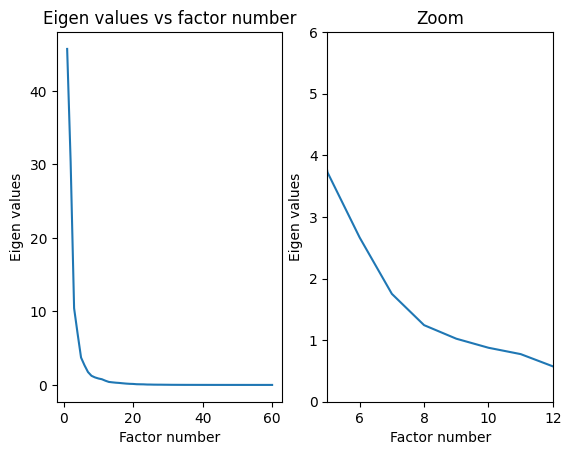

In [39]:
from sklearn.decomposition import PCA   

# Perform PCA
pca = PCA(n_components=None)  # This will determine the number of components automatically
X_pca = pca.fit_transform(znorm_scaled_x_train)

# Get eigenvalues and explained variance ratio
print(pca.n_components_)
eigenvalues = pca.explained_variance_
explained_variance = pca.explained_variance_ratio_

plt.subplot(1,2,1), plt.plot(np.arange(1,pca.n_components_+1),eigenvalues)
plt.title("Eigen values vs factor number")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.subplot(1,2,2), plt.plot(np.arange(1,pca.n_components_+1),eigenvalues)
plt.title("Zoom")
plt.ylabel("Eigen values")
plt.xlabel("Factor number")
plt.xlim([5, 12])
plt.ylim([0, 6])
plt.show()


In [ ]:
# kaiser criteria 
n_axes_kaiser  = len([x for x in eigenvalues if x > 1])
print("Number of components according to Kaiser criteria: ", n_axes_kaiser)

Number of components according to Kaiser criteria:  9


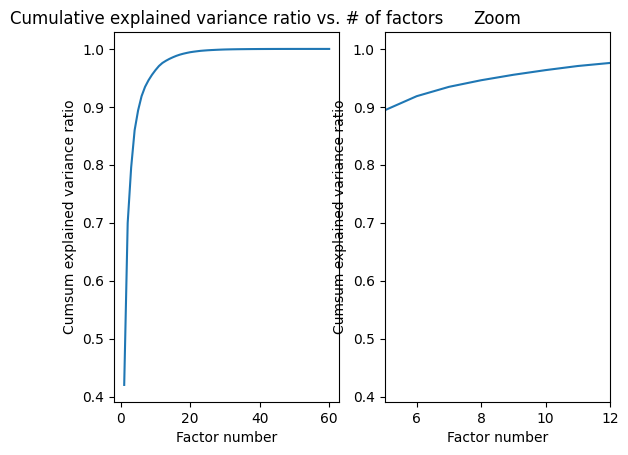

In [ ]:
plt.subplot(1,2,1), plt.plot(np.arange(1,pca.n_components_+1), np.cumsum(explained_variance))
plt.title("Cumulative explained variance ratio vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.subplot(1,2,2), plt.plot(np.arange(1,pca.n_components_+1), np.cumsum(explained_variance))
plt.title("Zoom")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.xlim([5, 12])
plt.show()


In [ ]:
print("cumulated quality with 8 axes: {} , cumulated quality with 9 axes: {}".format(np.sum(explained_variance[:9]), np.sum(explained_variance[:10])))

cumulated quality with 8 axes: 0.9553527900744723 , cumulated quality with 9 axes: 0.9634032258088715


Let's test PCA with 7, 8 and 9 components

## 7 components PCA 

In [41]:
pca = PCA(n_components=7)  # This will determine the number of components automatically
X_pca = pca.fit_transform(znorm_scaled_x_train)
X_pca.shape

(60, 7)

We are going to use the data like this in the prediction algorithm and not going back to the original dataframe and drop features. 
model.fit(X_pca, y_train)  # Assuming y_train is your target variable


# Make pred

## Drop useless features

In [48]:
X_train_filtered = znorm_scaled_x_train[best_rf_features.keys()] # drop all features but the five best 
X_val_filtered = znorm_scaled_x_val[best_rf_features.keys()]
print(X_train_filtered.shape)

(60, 5)


In [49]:
X_val_filtered.head()

,delta_f1_f2_gtv_original_shape_VoxelVolume,delta_f1_f2_gtv_original_shape_Sphericity,delta_f1_f2_gtv_original_glszm_LargeAreaEmphasis,delta_f1_f2_gtv_original_glcm_Autocorrelation,delta_f1_f2_gtv_original_glrlm_RunPercentage
0,-0.668776,-0.029023,-0.361240,-0.126140,-0.122404
1,-0.523954,0.010243,-0.282151,-0.010489,-0.056482
2,0.383522,0.005060,-0.145923,-0.184334,-0.747371
3,-0.107348,0.099683,-0.152314,0.283441,0.400852
4,-3.632456,-0.987449,0.350397,-1.514491,-1.097437


## Decision Tree

best mean cross-validation score: 0.789
best parameters: {'min_samples_split': 12}


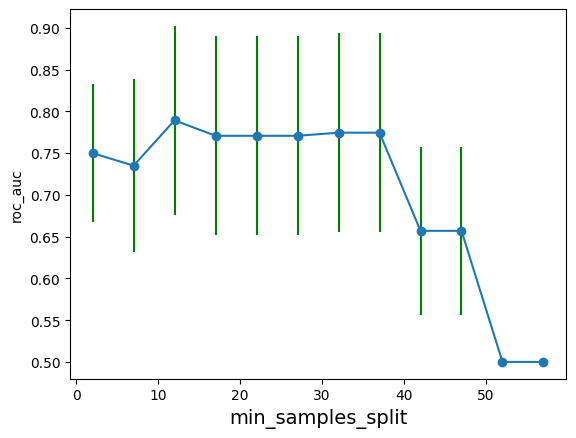

In [ ]:
from sklearn.tree import DecisionTreeClassifier

param_grid = {'min_samples_split': range(2, 60, 5)} # minimum number of samples required to split an internal node

scorer = 'roc_auc'
estimator = DecisionTreeClassifier(random_state=0, criterion='gini') # we can the change the criterion to entropy 

#HYPER PARAMETER SEARCH
grid_dt = sku.hyper_parameters_search(estimator, X_train_filtered, y_train, param_grid, scorer=scorer, cv=5)

# do the plotting
sku.plot_cv_scoring(grid_dt,'min_samples_split', scorer, plot_errors=True)

PERFORMANCE METRICS
	TRAIN	TEST
ACC:	95.00	64.00
SEN:	100.00	84.21
SPE:	81.25	0.00
PPV:	93.62	72.73
F1:	96.70	78.05


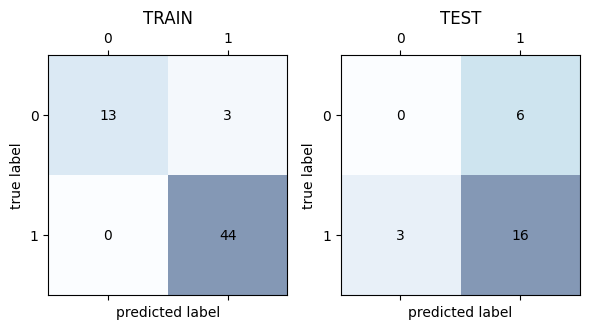

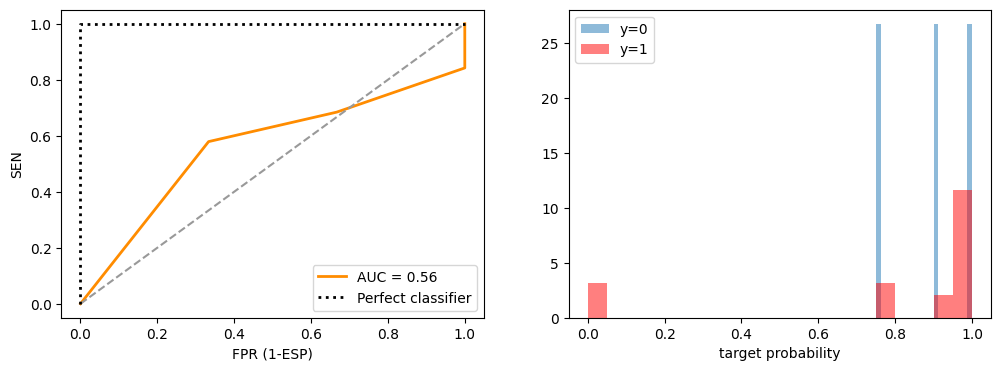

In [51]:
dt_model =  grid_dt.best_estimator_ 
sku.analyze_train_test_performance(dt_model, X_train_filtered, X_val_filtered, y_train, y_val)

## Random Forest

In [52]:
param_grid = {'max_depth': range(1, 21, 4), 'n_estimators' : range(25, 1001, 25)} # maximimum depth tuning

scorer = 'roc_auc'
estimator = RandomForestClassifier(random_state=42) 

grid_rf = sku.hyper_parameters_search(estimator, X_train_filtered, y_train, param_grid, scorer=scorer, cv=5)

best mean cross-validation score: 0.872
best parameters: {'max_depth': 5, 'n_estimators': 25}


PERFORMANCE METRICS
	TRAIN	TEST
ACC:	100.00	72.00
SEN:	100.00	94.74
SPE:	100.00	0.00
PPV:	100.00	75.00
F1:	100.00	83.72


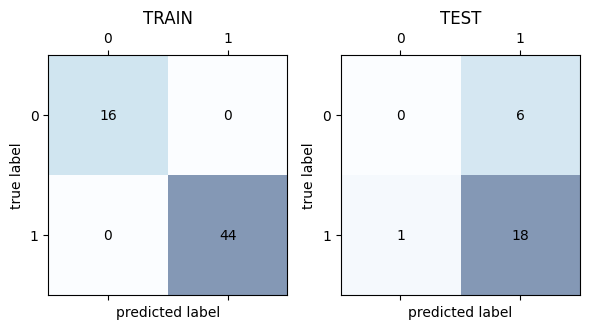

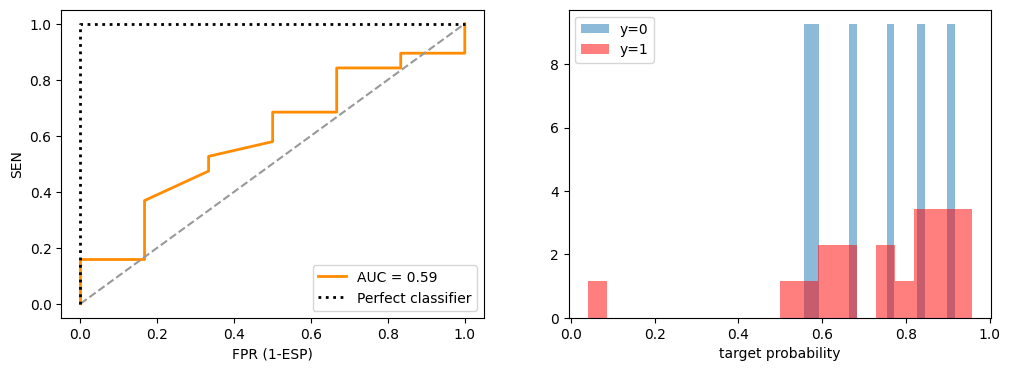

In [54]:
rf_model =  grid_rf.best_estimator_ 
sku.analyze_train_test_performance(rf_model, X_train_filtered, X_val_filtered, y_train, y_val)

Mauvaise prédiction sur les labels False (ceux qui ont pas eu de récurrence) car en sous-effectif: tenter SMOTE 

## AdaBoost

In [57]:
param_grid = {'n_estimators' : range(25, 1001, 25)} # number of estimators tuning

scorer = 'roc_auc' # 'f1'
estimator = AdaBoostClassifier(random_state=42, algorithm='SAMME') 

grid_adab = sku.hyper_parameters_search(estimator, X_train_filtered, y_train, param_grid, scorer=scorer, cv=5)

best mean cross-validation score: 0.744
best parameters: {'n_estimators': 100}


PERFORMANCE METRICS
	TRAIN	TEST
ACC:	100.00	56.00
SEN:	100.00	63.16
SPE:	100.00	33.33
PPV:	100.00	75.00
F1:	100.00	68.57


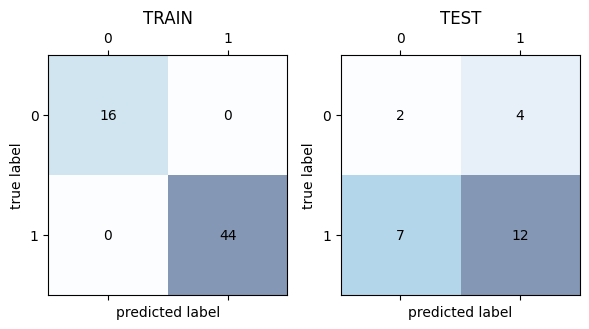

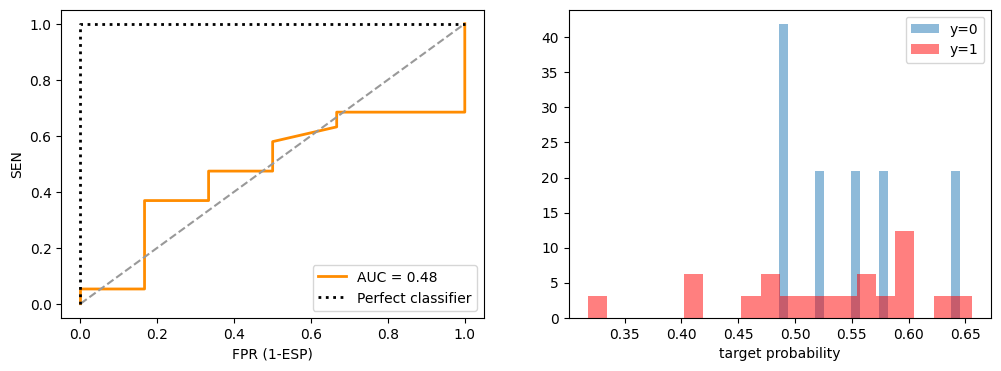

In [58]:
adab_model =  grid_adab.best_estimator_ 
sku.analyze_train_test_performance(adab_model, X_train_filtered, X_val_filtered, y_train, y_val)

## BaggingClassifier

In [107]:
from sklearn.ensemble import BaggingClassifier

param_grid = {'n_estimators' : range(25, 1001, 25)}
bagg = BaggingClassifier(oob_score=True)

grid_bagging = sku.hyper_parameters_search(bagg, X_train_filtered, y_train, param_grid, scorer=scorer, cv=5)

best mean cross-validation score: 0.847
best parameters: {'n_estimators': 475}


PERFORMANCE METRICS
	TRAIN	TEST
ACC:	100.00	64.00
SEN:	100.00	78.95
SPE:	100.00	16.67
PPV:	100.00	75.00
F1:	100.00	76.92


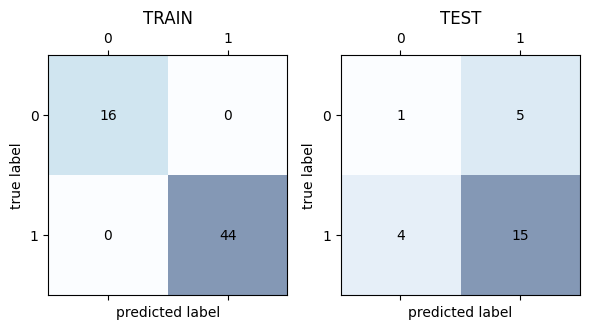

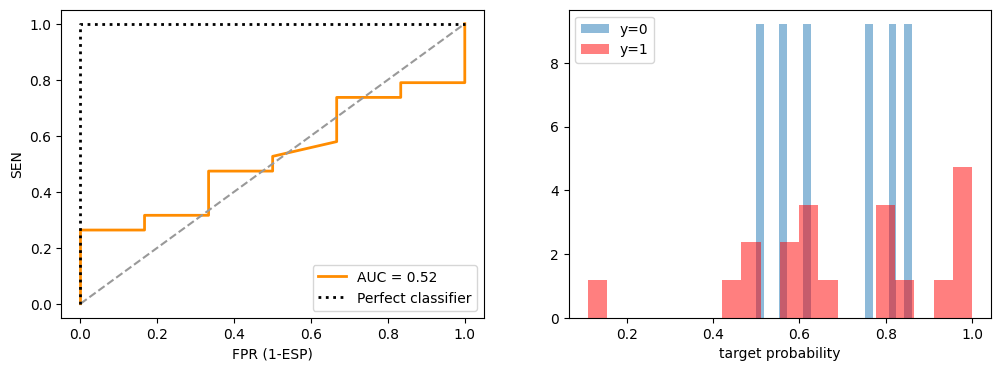

In [108]:
bagg_model = grid_bagging.best_estimator_ 
sku.analyze_train_test_performance(bagg_model, X_train_filtered, X_val_filtered, y_train, y_val)

## Linear SVM

In [61]:
from sklearn.svm import LinearSVC

lsvm = LinearSVC(random_state=42, dual=False)
param_grid = {'C' : list(np.arange(0.01, 0.11, 0.01))} # number of estimators tuning

grid_lsvm = sku.hyper_parameters_search(lsvm, X_train_filtered, y_train, param_grid, scorer=scorer, cv=5)

best mean cross-validation score: 0.875
best parameters: {'C': 0.04}


PERFORMANCE METRICS
	TRAIN	TEST
ACC:	90.00	64.00
SEN:	97.73	78.95
SPE:	68.75	16.67
PPV:	89.58	75.00
F1:	93.48	76.92


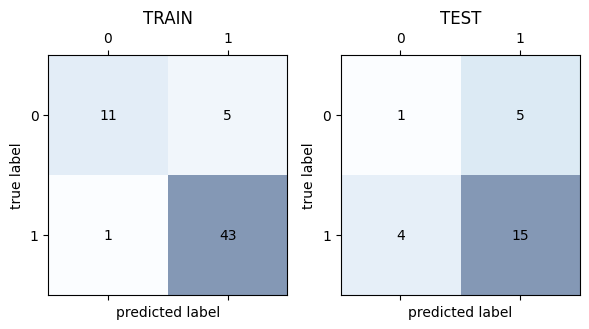

AttributeError: 'LinearSVC' object has no attribute 'predict_proba'

In [65]:
lsvm_model =  grid_lsvm.best_estimator_ 
sku.analyze_train_test_performance(lsvm_model, X_train_filtered, X_val_filtered, y_train, y_val)

## P-SVM
Test KSVM model: https://scikit-learn.org/stable/auto_examples/kernel_approximation/plot_scalable_poly_kernels.html#establishing-the-kernelized-svm-model as predictor 


In [68]:
from sklearn.svm import SVC

param_grid = {'C' : list(np.arange(0.01, 0.11, 0.01)), 'degree': range(2, 5, 1)} # number of estimators tuning

ksvm = SVC( kernel="poly", coef0=0, gamma=1.0, probability=True)
grid_ksvm = sku.hyper_parameters_search(ksvm, X_train_filtered, y_train, param_grid, scorer=scorer, cv=5)

best mean cross-validation score: 0.844
best parameters: {'C': 0.01, 'degree': 3}


PERFORMANCE METRICS
	TRAIN	TEST
ACC:	86.67	68.00
SEN:	100.00	84.21
SPE:	50.00	16.67
PPV:	84.62	76.19
F1:	91.67	80.00


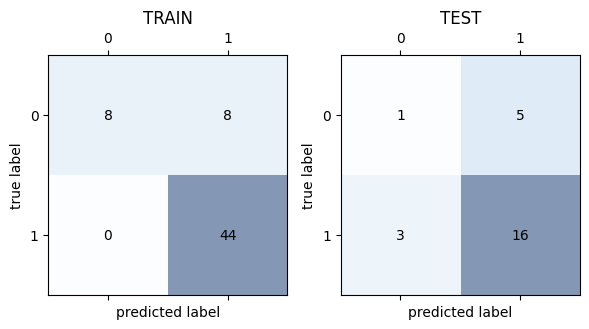

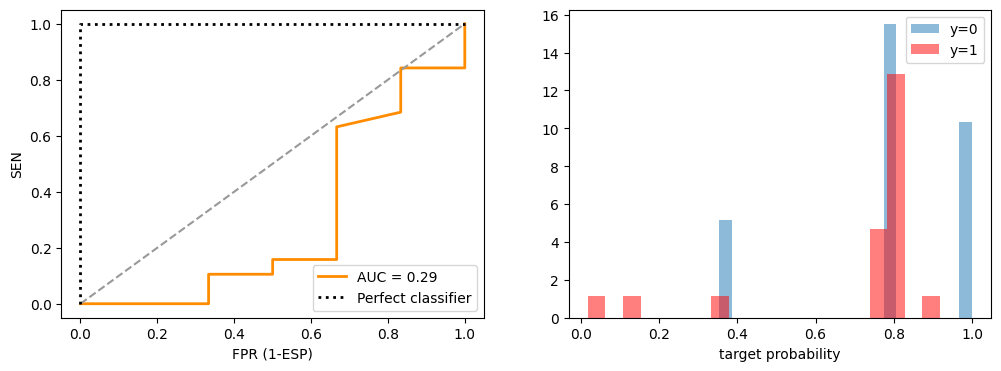

In [ ]:
ksvm_model =  grid_ksvm.best_estimator_ 
sku.analyze_train_test_performance(ksvm_model, X_train_filtered, X_val_filtered, y_train, y_val)

## KNN

best mean cross-validation score: 0.856
best parameters: {'n_neighbors': 6}


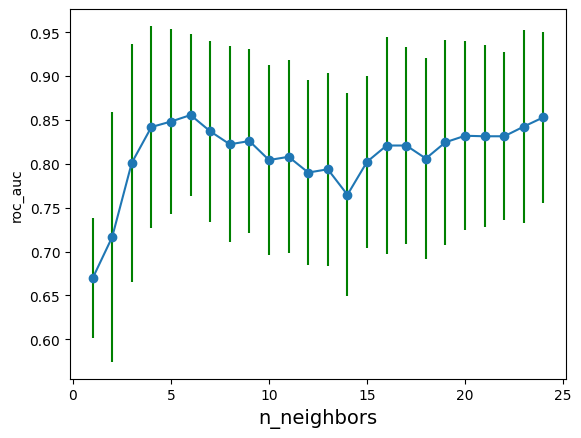

In [70]:
from sklearn.neighbors import KNeighborsClassifier


param_grid = {'n_neighbors': range(1,25)}

estimator = KNeighborsClassifier()

# param_grid
grid_knn = sku.hyper_parameters_search(estimator, X_train_filtered, y_train, param_grid, scorer=scorer, cv=5)

# do the plotting
sku.plot_cv_scoring(grid_knn,'n_neighbors', scorer, plot_errors=True)

PERFORMANCE METRICS
	TRAIN	TEST
ACC:	90.00	56.00
SEN:	93.18	73.68
SPE:	81.25	0.00
PPV:	93.18	70.00
F1:	93.18	71.79


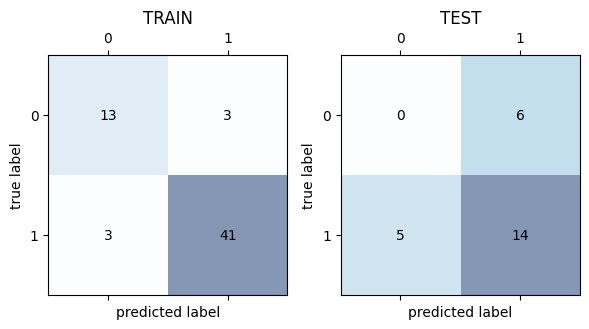

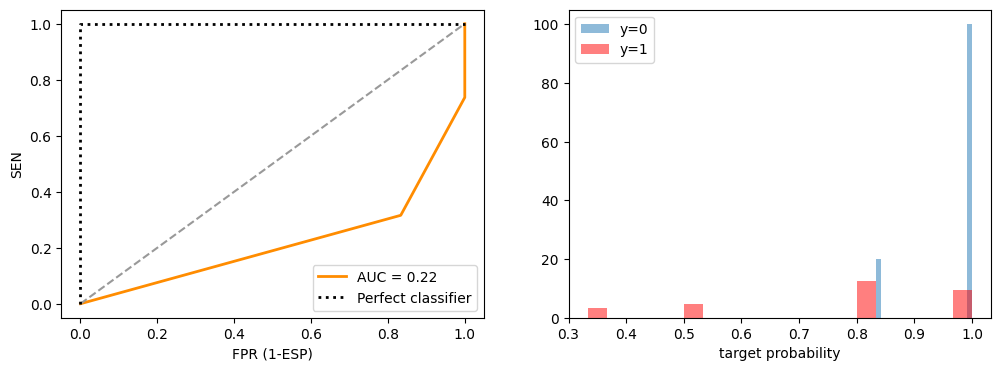

In [71]:
knn_model =  grid_knn.best_estimator_ 
sku.analyze_train_test_performance(knn_model, X_train_filtered, X_val_filtered, y_train, y_val)

PERFORMANCE METRICS
	TRAIN	TEST
ACC:	86.67	60.00
SEN:	97.73	78.95
SPE:	56.25	0.00
PPV:	86.00	71.43
F1:	91.49	75.00


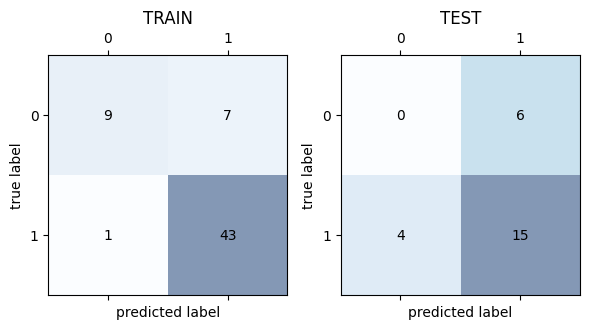

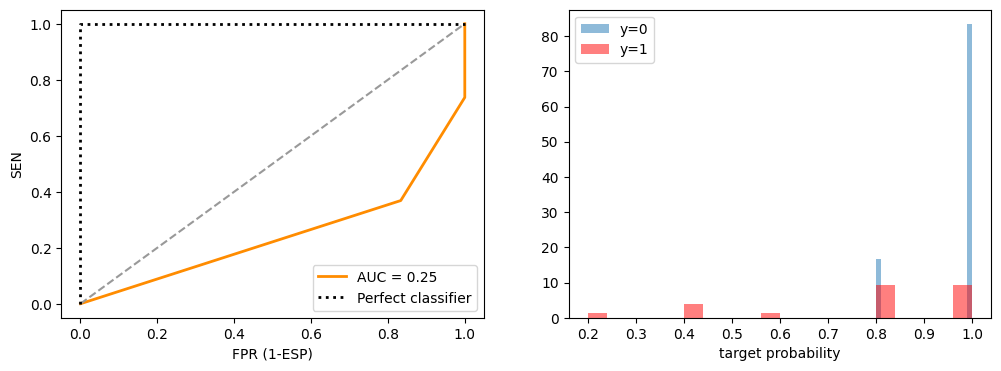

In [72]:
esstimator = KNeighborsClassifier(n_neighbors=4)
knn_model2 = estimator.fit(X_train_filtered, y_train)
sku.analyze_train_test_performance(knn_model2, X_train_filtered, X_val_filtered, y_train, y_val)

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

param_grid = {'solver': ['lbfgs', 'newton-cg']} # C is the inverse of regularization stength, as in SVM 

logreg = LogisticRegression(multi_class='multinomial', penalty=None) 
grid_logreg = sku.hyper_parameters_search(logreg, X_train_filtered, y_train, param_grid, scorer=scorer, cv=5)



best mean cross-validation score: 0.838
best parameters: {'solver': 'lbfgs'}


PERFORMANCE METRICS
	TRAIN	TEST
ACC:	86.67	56.00
SEN:	93.18	68.42
SPE:	68.75	16.67
PPV:	89.13	72.22
F1:	91.11	70.27


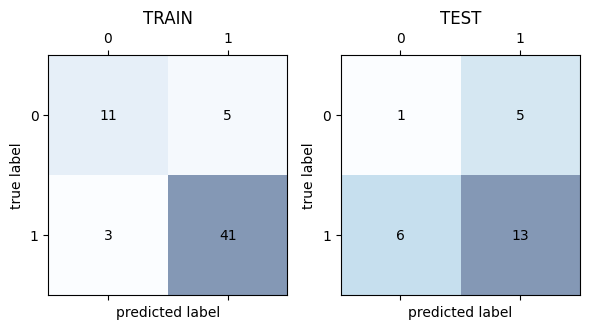

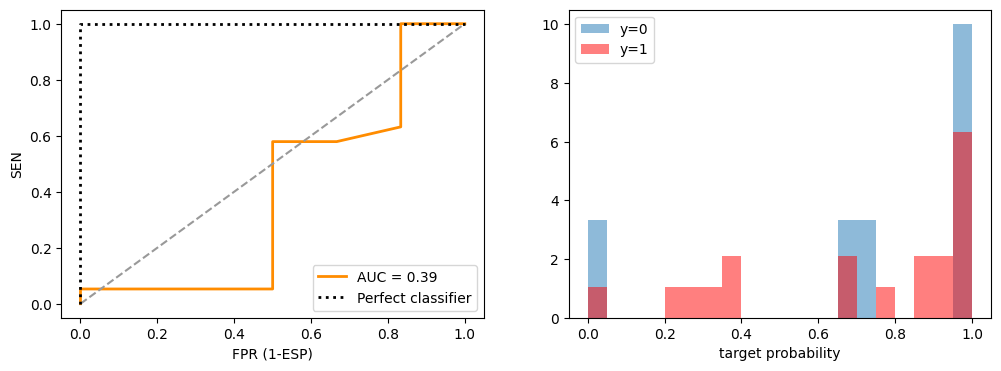

In [91]:
logreg_model = grid_logreg.best_estimator_
sku.analyze_train_test_performance(logreg_model, X_train_filtered, X_val_filtered, y_train, y_val)

## Logistic regression with Ridge

In [96]:

logreg_ridge = LogisticRegression(multi_class='multinomial', penalty='l2') 
grid_logreg_ridge = sku.hyper_parameters_search(logreg_ridge, X_train_filtered, y_train, param_grid, scorer=scorer, cv=5)


best mean cross-validation score: 0.876
best parameters: {'C': 0.2021181818181818, 'solver': 'newton-cg'}


PERFORMANCE METRICS
	TRAIN	TEST
ACC:	88.33	64.00
SEN:	97.73	84.21
SPE:	62.50	0.00
PPV:	87.76	72.73
F1:	92.47	78.05


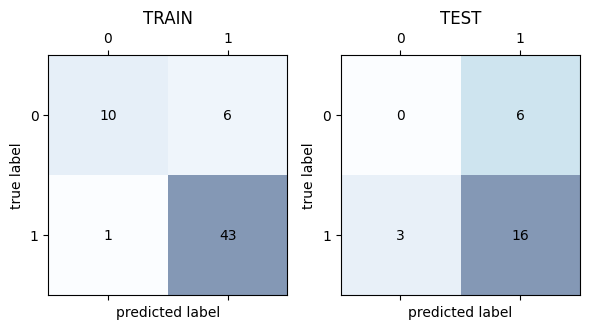

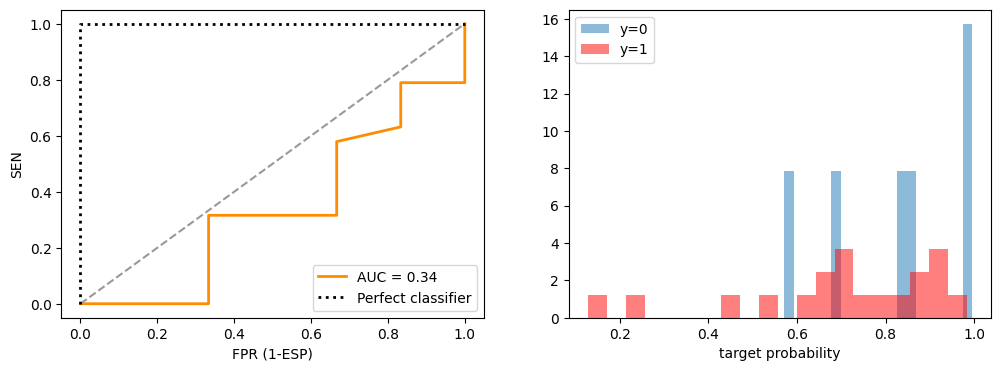

In [97]:
logreg_ridge_model = grid_logreg_ridge.best_estimator_
sku.analyze_train_test_performance(logreg_ridge_model, X_train_filtered, X_val_filtered, y_train, y_val)

## Multi Layer Perceptron

In [105]:
from sklearn.neural_network import MLPClassifier
import warnings
warnings.filterwarnings('ignore')

param_grid = {
    'alpha' : 10.0 ** -np.arange(2, 5), 
    'learning_rate_init': 10.0 ** -np.arange(2, 5),
}

scorer = 'roc_auc'
mlp = MLPClassifier(random_state=42, max_iter=1000, hidden_layer_sizes=(100, 100), solver='adam', learning_rate='invscaling')
grid_mlp = sku.hyper_parameters_search(mlp, X_train_filtered, y_train, param_grid, scorer=scorer, cv=5)

best mean cross-validation score: 0.876
best parameters: {'alpha': 0.01, 'learning_rate_init': 0.0001}


PERFORMANCE METRICS
	TRAIN	TEST
ACC:	91.67	68.00
SEN:	97.73	84.21
SPE:	75.00	16.67
PPV:	91.49	76.19
F1:	94.51	80.00


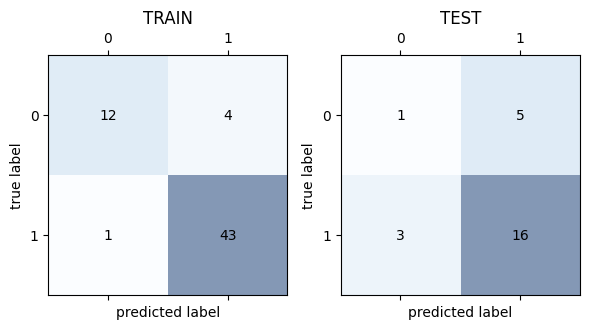

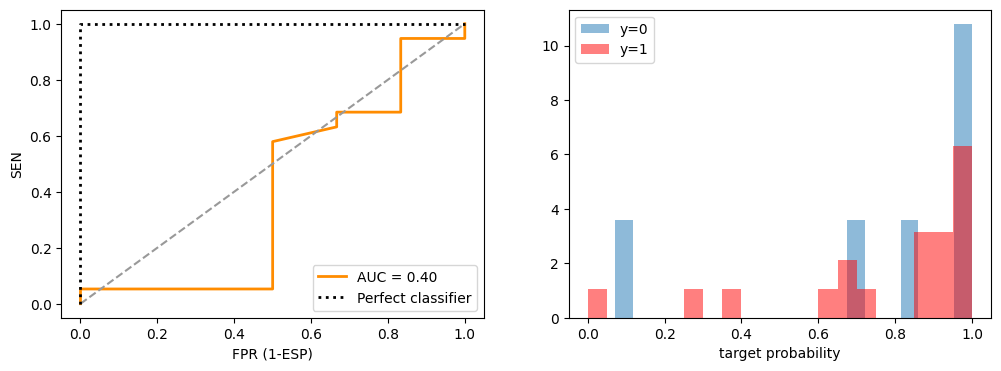

In [106]:
mlp_model = grid_mlp.best_estimator_
sku.analyze_train_test_performance(mlp_model, X_train_filtered, X_val_filtered, y_train, y_val) 

## XGBoost
Installer avec pip et voir docu https://inside-machinelearning.com/xgboost/

## LinearDiscriminantAnalysis

## Quadratic DiscriminantAnalysis